# Proportion plots

> A guide to plot proportion plots with binary data.

- order: 3

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #31708f; background-color: #d9edf7; border-color: #bce8f1;"> As of v2023.02.14, DABEST can be used to generate Cohen's *h* and the corresponding proportion plot for binary data. It's important to note that the code we provide only supports numerical proportion data, 
where the values are limited to 0 (failure) and 1 (success). This means that the code is not suitable for 
analyzing proportion data that contains non-numeric values, such as strings like 'yes' and 'no'. </div>


## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


## Creating a demo dataset

In [ ]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df = create_demo_prop_dataset()
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Test 7,Test 8,Test 9,Gender,ID
0,1,0,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,1
1,0,1,0,1,1,1,0,0,0,1.0,0.0,0.0,Female,2
2,0,1,0,0,1,0,1,1,0,1.0,0.0,0.0,Female,3
3,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,4
4,0,0,0,0,1,0,0,0,1,1.0,0.0,0.0,Female,5


### Convenient funtion to create a dataset for Unpaired Proportion Plot

In DABEST v2024.3.29, we incorporated feedback from biologists who may not have tables of 0’s and 1’s readily available. As a result, a convenient function to generate a binary dataset based on the specified sample sizes is provided. Users can generate a pandas.DataFrame containing the sample sizes for each element in the groups and the group names (optional if the sample sizes are provided in a dict).

In [ ]:
sample_size_1 = {'a':[3, 4], 'b':[2, 5]}
sample_size_2 = [3, 4, 2, 5]
names = ['a', 'b']
sample_df_1 = dabest.prop_dataset(sample_size_1)
sample_df_2 = dabest.prop_dataset(sample_size_2, names)
print(all(sample_df_1 == sample_df_2))
sample_df_1.head()

True


,a,b,ID
0,0,0,1
1,0,0,2
2,0,1,3
3,1,1,4
4,1,1,5


## Loading data

When loading data, you need to set the parameter ``proportional=True``.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
two_groups_unpaired

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:41:01 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

## Effect sizes

To generate a proportion plot, the **dabest** library features two effect sizes:

  - the mean difference (``mean_diff``)
  - [Cohen's h](https://en.wikipedia.org/wiki/Cohen's_h) (`cohens＿h`)

These are attributes of the ``Dabest`` object.

In [ ]:
two_groups_unpaired.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:41:01 2024.

The unpaired mean difference between Control 1 and Test 1 is 0.575 [95%CI 0.35, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

Let's compute the *Cohen's h* for our comparison.

In [ ]:
two_groups_unpaired.cohens_h

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:41:02 2024.

The unpaired Cohen's h between Control 1 and Test 1 is 1.24 [95%CI 0.769, 1.66].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.cohens_h.statistical_tests`

## Generating proportion plots

To generate a **Gardner-Altman estimation plot**, simply use the
``.plot()`` method. 

Each effect size instance has access to the ``.plot()`` method, allowing you to quickly create plots for different effect sizes with ease.

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


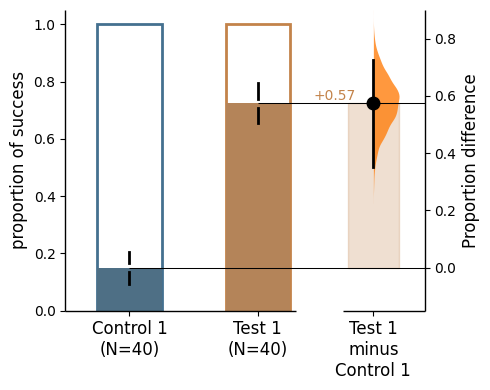

In [ ]:
two_groups_unpaired.mean_diff.plot();

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


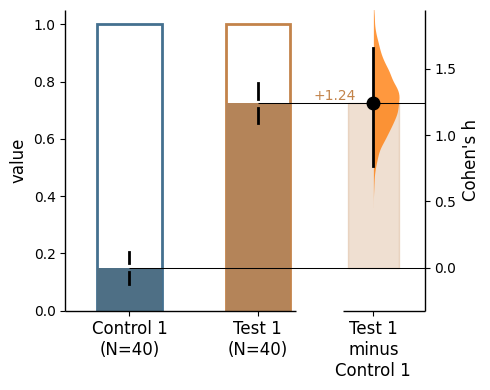

In [ ]:
two_groups_unpaired.cohens_h.plot();

In the bar plot, the white portion represents the proportion of observations in the dataset that do not belong to the category, equivalent to the proportion of 0 in the data. Conversely, the colored portion represents the proportion of observations belonging to the category, equivalent to the proportion of 1 in the data. By default, the value of ‘group_summaries’ is set to “mean_sd,” displaying the mean and ± standard deviation of each group as gapped lines in the plot. The gap represents the mean, while the vertical ends represent the standard deviation. Alternatively, if the value of ‘group_summaries’ is set to “median_quartiles,” the median and 25th and 75th percentiles of each group are plotted. By default, the bootstrap effect sizes are plotted on the right axis.

Instead of a Gardner-Altman plot, you can generate a **Cumming estimation plot** by setting ``float_contrast=False`` in the ``plot()`` method. This will plot the bootstrap effect sizes below the raw data.

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


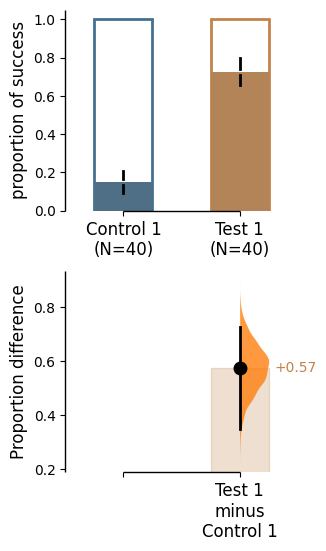

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

You can also modify the width of bars by setting the parameter ``bar_width`` in the ``plot()`` method. 


/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


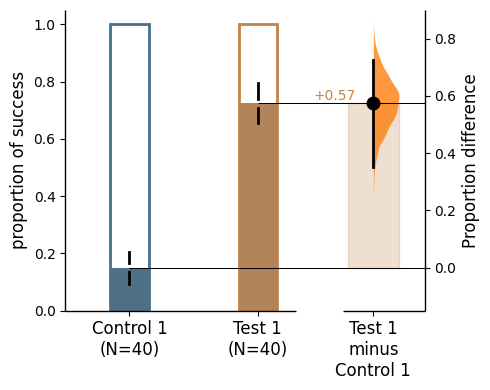

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_width=0.3);

The ``bar_desat`` is used to control the amount of desaturation applied to the bar colors. A value of 0.0 means full desaturation (i.e., grayscale), 
while a value of 1.0 means no desaturation (i.e., full color saturation). The default one is 0.8.


/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


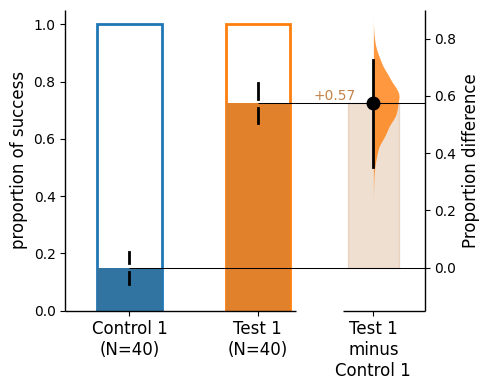

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_desat=1.0);

The parameters ``bar_label`` and ``contrast_label`` can be used to set labels for the y-axis of the bar plot and the contrast plot.

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


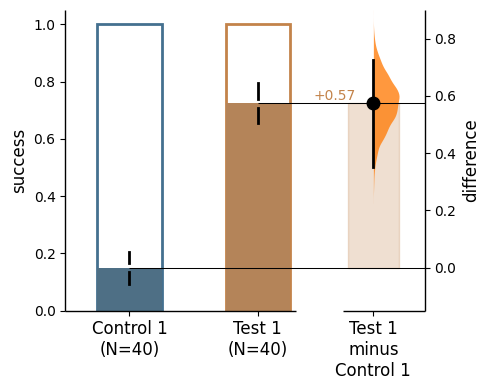

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_label="success",contrast_label="difference");

The color of the error bar can be modified by setting ``err_color``.

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


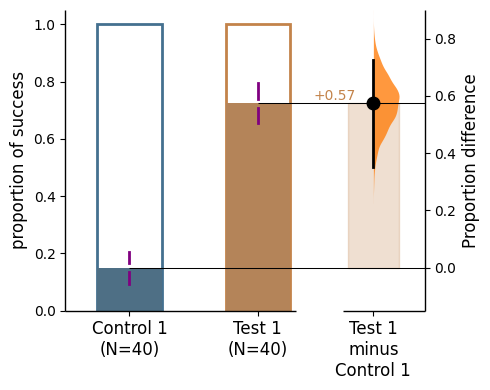

In [ ]:
two_groups_unpaired.mean_diff.plot(err_color="purple");

## Generating results

In [ ]:
two_groups_unpaired.cohens_h.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,proportional_difference
0,Control 1,Test 1,40,40,Cohen's h,None,1.242163,95,0.769088,1.659486,...,1.72357,"(125, 4875)","[1.4827506328621212, 1.0122770907407532, 1.491...",5000,12345,"[-0.25268025514207904, 0.050400851615126196, -...",0.0,5000,"[0.012419871794871796, 0.012612179487179487, 0...",1.242163


## Producing estimation plots

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


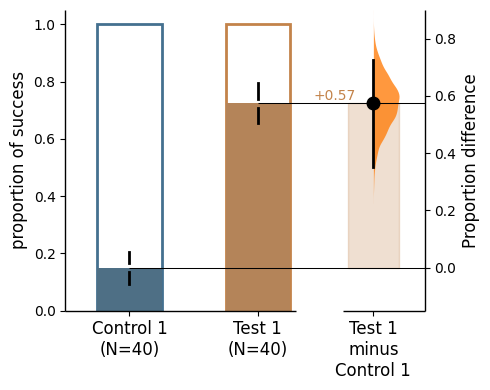

In [ ]:
two_groups_unpaired.mean_diff.plot();

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


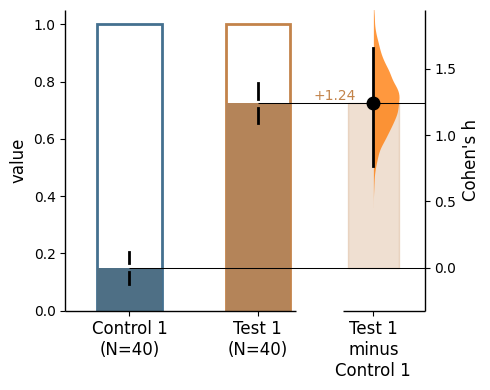

In [ ]:
two_groups_unpaired.cohens_h.plot();

The white part in the bar represents the proportion of observations in the dataset that do not belong to the category, which is 
equivalent to the proportion of 0 in the data. The colored part, on the other hand, represents the proportion of observations 
that belong to the category, which is equivalent to the proportion of 1 in the data. By default, the value of "group_summaries"
is set to "mean_sd". This means that the error bars in the plot display the mean and ± standard deviation of each group as 
gapped lines. The gap represents the mean, while the vertical ends represent the standard deviation. Alternatively, if the 
value of "group_summaries" is set to "median_quartiles", the median and 25th and 75th percentiles of each group are plotted instead. 
By default, the bootstrap effect sizes is plotted on the right axis.

Instead of a Gardner-Altman plot, you can generate a **Cumming estimation
plot** by setting ``float_contrast=False`` in the ``plot()`` method.
This will plot the bootstrap effect sizes below the raw data.

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


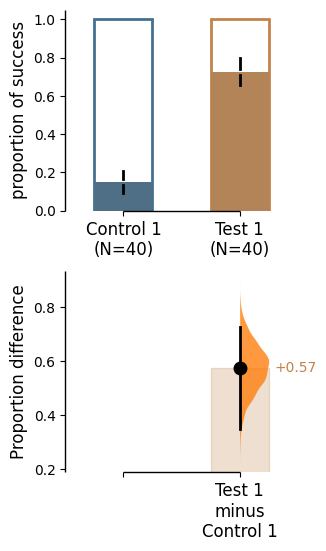

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

## Generating Sankey plots for paired proportions and repeated-measures proportions

For the paired version of the proportion plot, we adopt the style of a Sankey Diagram. The width of each bar in each xtick represents the proportion of the corresponding label in the group, and the strip denotes the paired relationship for each observation.

Starting from v2024.3.29, the paired version of the proportion plot receives a major upgrade. We introduce the ``sankey`` and ``flow`` parameters to control the plot. By default, both ``sankey`` and ``flow`` are set to True to cater the needs of repeated measures. When ``sankey`` is set to False, DABEST will generate a bar plot with a similar aesthetic to the paired proportion plot. When ``flow`` is set to False, each group of comparsion forms a Sankey diagram that does not connect to other groups of comparison.

Similar to the unpaired version, the ``.plot()`` method is used to produce a **Gardner-Altman estimation plot**, the only difference is that
the ``is_paired`` parameter is set to either ``baseline`` or  ``sequential`` when loading data.


/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


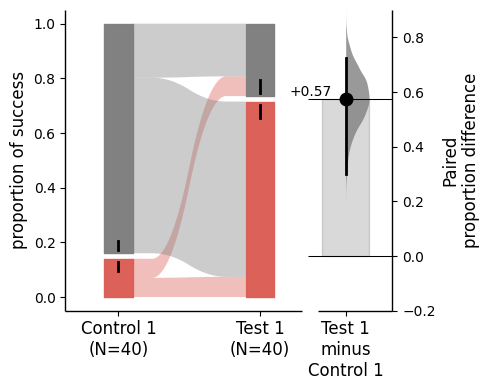

In [ ]:
two_groups_baseline = dabest.load(df, idx=("Control 1", "Test 1"), 
                                  proportional=True, paired="baseline", id_col="ID")
    
two_groups_baseline.mean_diff.plot();

The Sankey plots for paired proportions also supports the ``float_contrast`` parameter, which can be set to ``False`` to produce a **Cumming estimation plot**.


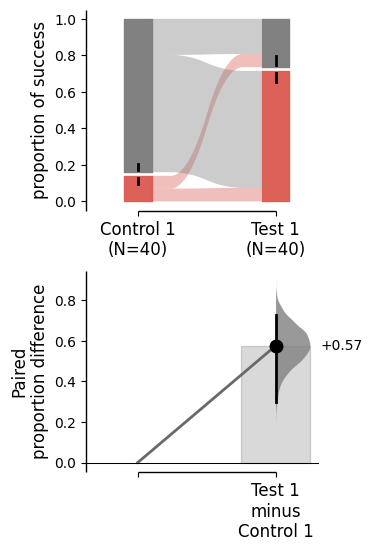

In [ ]:
two_groups_baseline.mean_diff.plot(float_contrast=False);

The upper part (grey section) of the bar represents the proportion of observations in the dataset that do not belong to the category, equivalent to the proportion of 0 in the data. The lower part, conversely, represents the proportion of observations that belong to the category, synonymous with **success**, equivalent to the proportion of 1 in the data. 

Repeated measures are also supported in the Sankey plots for paired proportions. By adjusting the ``is_paired`` parameter, two types of plot can be generated.

By default, the raw data plot (upper part) in both ``baseline`` and ``sequential`` repeated measures remains the same; the only difference is the lower part. For detailed information about repeated measures, please refer to [repeated measures](02-repeated_measures.ipynb) .

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


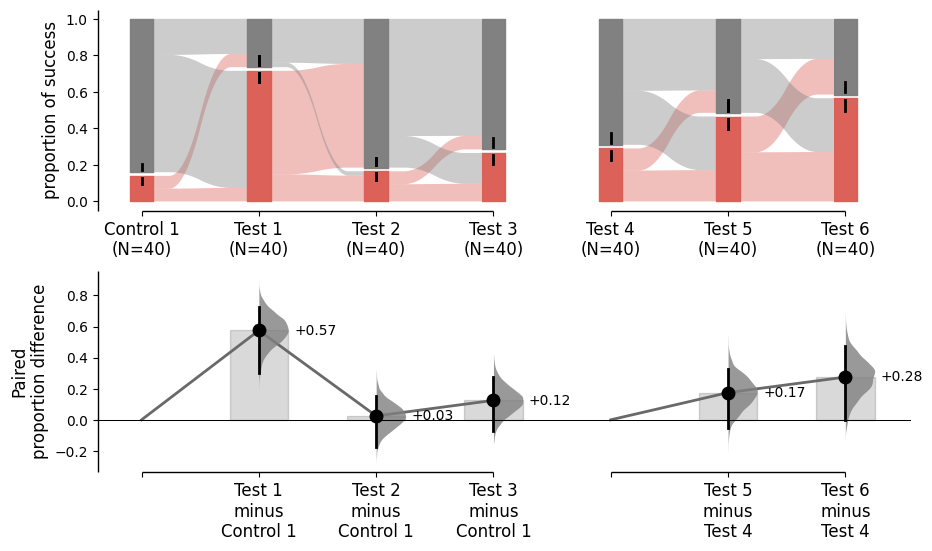

In [ ]:
multi_group_baseline = dabest.load(df, idx=((("Control 1", "Test 1","Test 2", "Test 3"),
                                ("Test 4", "Test 5", "Test 6"))),
                    proportional=True, paired="baseline", id_col="ID")

multi_group_baseline.mean_diff.plot();

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


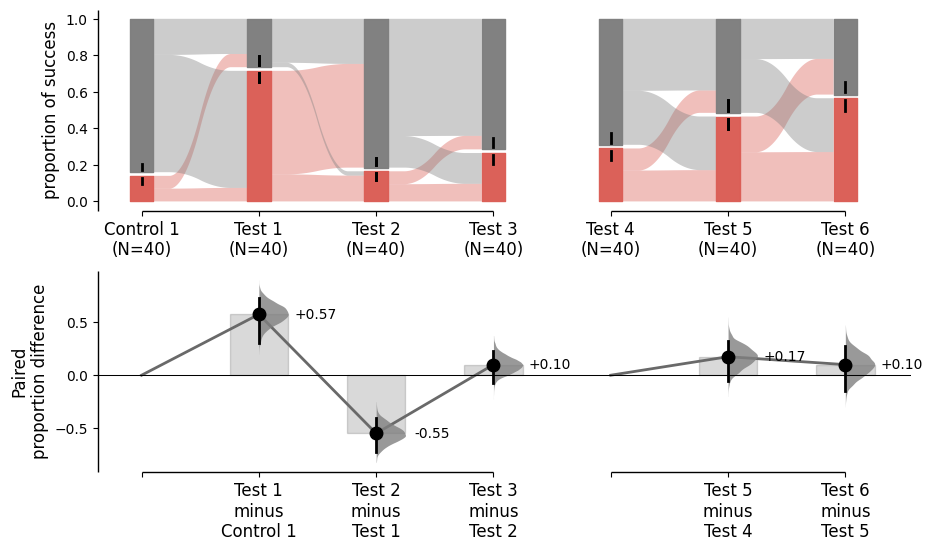

In [ ]:
multi_group_sequential = dabest.load(df, idx=((("Control 1", "Test 1","Test 2", "Test 3"),
                                ("Test 4", "Test 5", "Test 6"))),
                    proportional=True, paired="sequential", id_col="ID")

multi_group_sequential.mean_diff.plot();

If you want to specify the order of the groups, you can use the ``idx`` parameter in the ``.load()`` method.

To compare all groups together, you can include all the groups in the ``idx`` parameter of the ``load()`` method without using subbrackets."

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


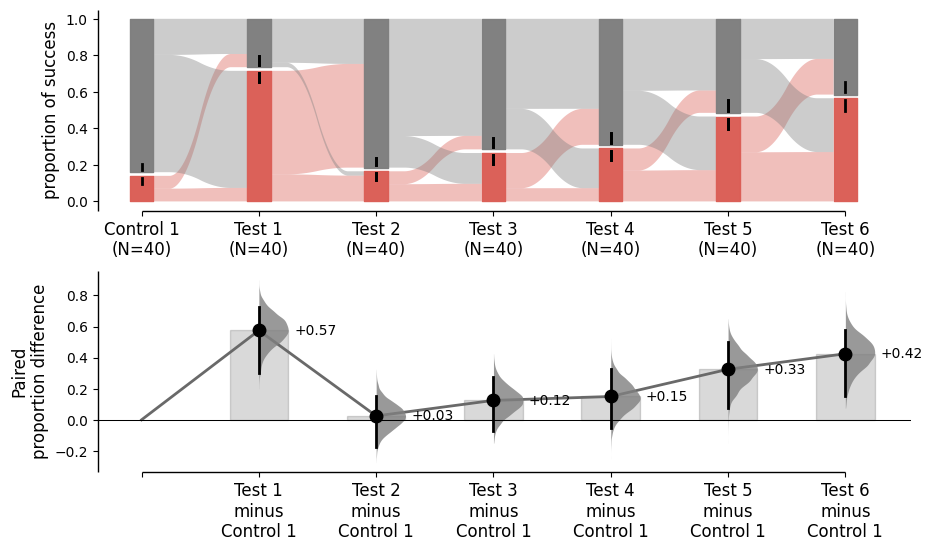

In [ ]:
multi_group_baseline_specify = dabest.load(df, idx=(("Control 1", "Test 1","Test 2", "Test 3",
                                "Test 4", "Test 5", "Test 6")),
                    proportional=True, paired="baseline", id_col="ID")

multi_group_baseline_specify.mean_diff.plot();

By changing the ``sankey`` and ``flow`` parameters, you can generate different types of Sankey plots for paired proportions.

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


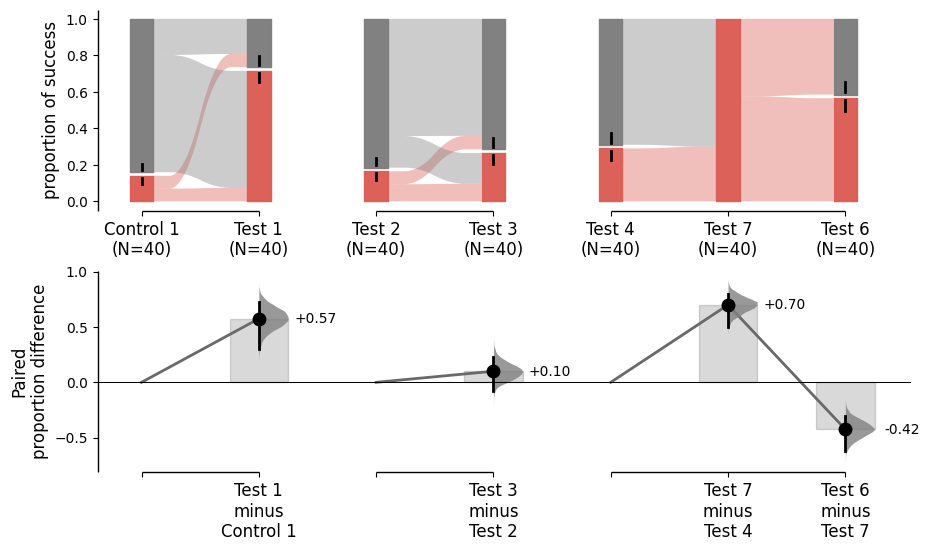

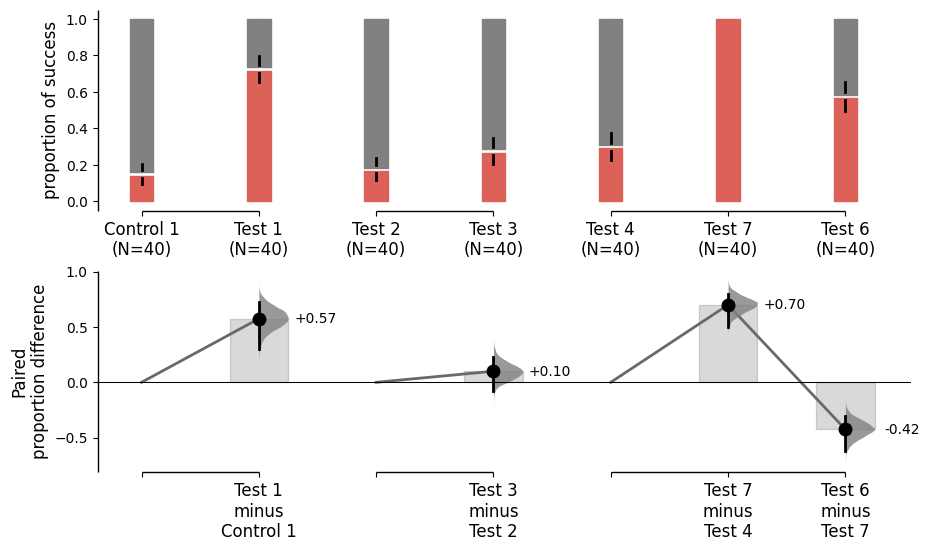

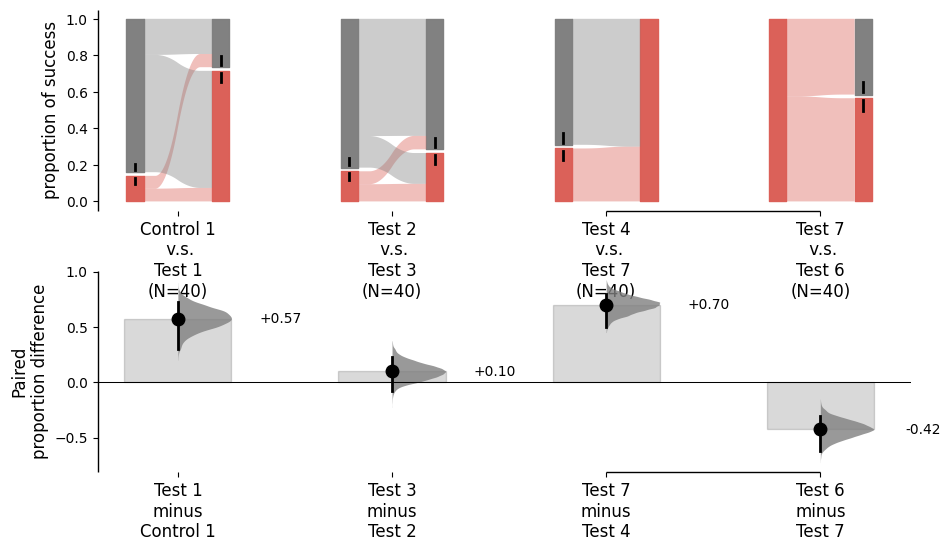

In [ ]:
separate_control = dabest.load(df, idx=((("Control 1", "Test 1"),
                                ("Test 2", "Test 3"),
                                ("Test 4", "Test 7", "Test 6"))),
                    proportional=True, paired="sequential", id_col="ID")

separate_control.mean_diff.plot();
separate_control.mean_diff.plot(sankey_kwargs={'sankey':False});
separate_control.mean_diff.plot(sankey_kwargs={'flow':False});

Several exclusive parameters can be provided to the ``plot()`` method to customize the Sankey plots for paired proportions.
By modifying the sankey_kwargs parameter, you can customize the Sankey plot. The following parameters are supported:

- **width**: The width of each Sankey bar. Default is 0.5.
- **align**: The alignment of each Sankey bar. Default is "center".
- **alpha**: The transparency of each Sankey bar. Default is 0.4.
- **bar_width**: The width of each bar on the side in the plot. Default is 0.1.


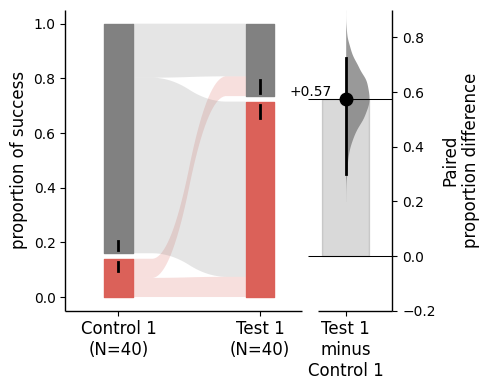

In [ ]:
two_groups_baseline.mean_diff.plot(sankey_kwargs = {"alpha": 0.2});

## Add counts to proportion plots

By default, the sample counts for each bar in proportion plots are not shown.

This feature can be turned on by setting `prop_sample_counts=True` in the `plot()` function.

**Note**: This feature is not compatible with `flow=False` in `sankey_kwargs`.

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()
/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


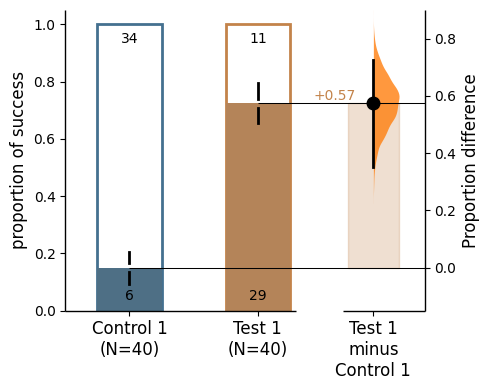

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)
two_groups_unpaired.mean_diff.plot(prop_sample_counts=True);

The sample counts kwargs can be utilised via `prop_sample_counts_kwargs` in the `plot()` function.

By default, the following keywords are passed:

- 'color': 'k'
- 'zorder': 5 
- 'ha': 'center'
- 'va': 'center

/Users/jonathananns/anaconda3/envs/DABESTDEV/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


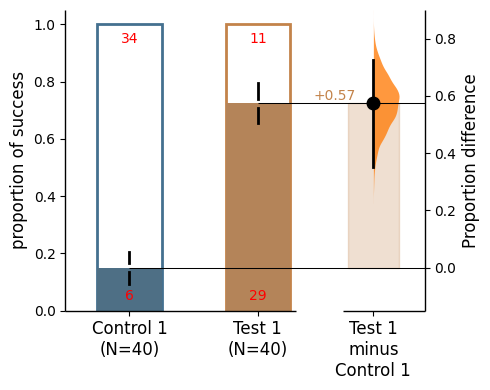

In [ ]:
two_groups_unpaired.mean_diff.plot(prop_sample_counts=True, prop_sample_counts_kwargs={"color":"red"});